<a href="https://colab.research.google.com/github/phoebelh/PyTorch/blob/main/neural_network_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# create a model calss that inherits nn.Module
class Model(nn.Module):
  #input layer (4 features of the flower) ->
  # hidden layer 1 (some # neurons) --> H2 -->
  # output (tells us which flower)

  def __init__(self,in_features=4, h1=8, h2=9,out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x)) # if <0 just move on, otherwise use the number
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [3]:
# pick a manual seed for randomization
torch.manual_seed(32)

# create an instance of a model
model = Model()

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
# change species from strings to int
df['species'] = df['species'].replace('setosa', 0.0)
df['species'] = df['species'].replace('versicolor', 1.0)
df['species'] = df['species'].replace('virginica', 2.0)

<ipython-input-7-57a53965076d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace('virginica', 2.0)


In [8]:
# train test split, set x y
X = df.drop('species', axis=1)
y = df['species']

In [9]:
# convert to numpy array
X = X.values
y = y.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# run train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [12]:
# convert X features and y featurs to float and long, respectively
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
# set the croterion of model to measure the error, how far off the predictinos are from the data
criterion = nn.CrossEntropyLoss()

# choose an optimizer
# Adam Optimizer
# set learning rate (if error doesnt go down as we learn, we want to lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
# parameter is basically passing the 4 features of data that we have all at once and go through the layers, get output
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>


In [15]:
# train model
# Epochs? (one run through all the training data in our network)
epoch = 100
losses = []
for i in range(epoch):
  # go forward
  y_pred = model.forward(X_train) # get predocted result

  # measure loss/error
  loss = criterion(y_pred, y_train)

  # keep track of losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # do some back propagation: take error rate of forward propagation and feed it back
  # thru the network to fine tune the weights!
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1507114171981812
Epoch: 10 and loss: 0.9377315044403076
Epoch: 20 and loss: 0.7798256278038025
Epoch: 30 and loss: 0.6099401712417603
Epoch: 40 and loss: 0.40079930424690247
Epoch: 50 and loss: 0.25436317920684814
Epoch: 60 and loss: 0.15053048729896545
Epoch: 70 and loss: 0.10086944699287415
Epoch: 80 and loss: 0.08128313720226288
Epoch: 90 and loss: 0.07231426984071732


Text(0.5, 0, 'Epoch')

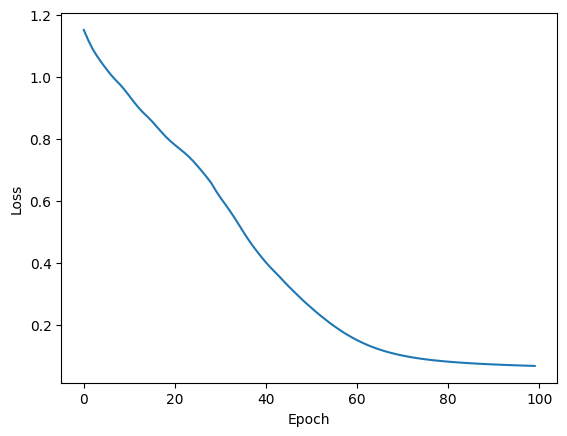

In [16]:
# graph
plt.plot(range(epoch), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [19]:
# evaluate model on test data set (validate model on test set)
with torch.no_grad(): # basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # find the loss / error
  print(loss)

tensor(0.0581)


In [20]:
loss

tensor(0.0581)

In [25]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # this will tell us what type of flower class our network think it is
    print(f'{i+1:2}. {str(data.numpy()):29} {y_val.argmax().item()}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
  print("correct: ",correct)

 1. [5.7 2.9 4.2 1.3]             1
 2. [6.7 3.1 4.4 1.4]             1
 3. [4.7 3.2 1.6 0.2]             0
 4. [6.5 2.8 4.6 1.5]             1
 5. [6.1 2.6 5.6 1.4]             2
 6. [6.3 3.3 6.  2.5]             2
 7. [4.8 3.4 1.9 0.2]             0
 8. [5.1 3.5 1.4 0.3]             0
 9. [6.4 3.1 5.5 1.8]             2
10. [6.9 3.2 5.7 2.3]             2
11. [6.8 3.2 5.9 2.3]             2
12. [4.4 3.  1.3 0.2]             0
13. [6.3 3.4 5.6 2.4]             2
14. [6.1 2.9 4.7 1.4]             1
15. [6.9 3.1 5.1 2.3]             2
16. [6.4 2.9 4.3 1.3]             1
17. [6.  3.  4.8 1.8]             2
18. [5.2 3.5 1.5 0.2]             0
19. [6.3 3.3 4.7 1.6]             1
20. [7.2 3.2 6.  1.8]             2
21. [4.9 3.1 1.5 0.1]             0
22. [5.7 3.8 1.7 0.3]             0
23. [6.5 3.  5.8 2.2]             2
24. [4.8 3.  1.4 0.1]             0
25. [6.  2.2 5.  1.5]             2
26. [6.2 2.8 4.8 1.8]             2
27. [6.1 3.  4.6 1.4]             1
28. [6.1 2.8 4.  1.3]       

In [26]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.7])

In [28]:
with torch.no_grad():
  print(model.forward(new_iris))
  # biggest number is what it think it is, in this case 0

tensor([ 5.7309,  0.9032, -9.2159])


In [30]:
newer_iris = torch.tensor([5.7, 2.5, 5.0, 2.0])
with torch.no_grad():
  print(model.forward(newer_iris)) # this is 2!

tensor([-8.5652,  1.9588,  7.5624])


In [31]:
# SAVE our NN model
torch.save(model.state_dict(), 'iris_model.pt')

In [32]:
# load the save model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<ipython-input-32-84f3b543a748>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_model.pt'))


<All keys matched successfully>

In [34]:
# make sure loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)